In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import re
import nltk
from nltk.corpus import stopwords
import spacy
from nltk.tokenize import word_tokenize

nltk.download('stopwords')


import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize, sent_tokenize

import nltk
nltk.download('punkt')
nltk.download('punkt_tab') # Download the punkt_tab resource

from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
import pandas as pd
import nltk
nltk.download('punkt')
import spacy
nlp = spacy.load("en_core_web_sm")
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize , sent_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import  ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#df_Fake = pd.read_csv('/content/drive/MyDrive/Fake.csv')
#df_Fake

NameError: name 'pd' is not defined

In [ ]:
df_Fake = pd.read_csv('/content/Fake.csv')
df_Fake
df_True = pd.read_csv('/content/True.csv')
df_True

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [ ]:
#df_True = pd.read_csv('/content/drive/MyDrive/True.csv')
#df_True

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [ ]:
print(f"Number of Row : {df_Fake.shape[0]}\nNumber of Columns : {df_Fake.shape[1]}")

Number of Row : 23481
Number of Columns : 4


In [ ]:
print(f"Number of Row : {df_True.shape[0]}\nNumber of Columns : {df_True.shape[1]}")

Number of Row : 21417
Number of Columns : 4


In [ ]:
df_Fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [ ]:
df_True.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [ ]:
df_Fake.isna().sum()

,0
title,0
text,0
subject,0
date,0


In [ ]:
df_True.isna().sum()

,0
title,0
text,0
subject,0
date,0


In [ ]:
# Hiển thị dữ liệu mô tả tin tức giả
pd.DataFrame({'Count':df_Fake.shape[0],
              'Null':df_Fake.isnull().sum(),
              'Null %':df_Fake.isnull().mean() * 100,
              'Cardinality':df_Fake.nunique()
})

,Count,Null,Null %,Cardinality
title,23481,0,0.0,17903
text,23481,0,0.0,17455
subject,23481,0,0.0,6
date,23481,0,0.0,1681


In [ ]:
# hiển thị mô tả dữ liệu tin tức thật
pd.DataFrame({'Count':df_True.shape[0],
              'Null':df_True.isnull().sum(),
              'Null %':df_True.isnull().mean() * 100,
              'Cardinality':df_True.nunique()
})

,Count,Null,Null %,Cardinality
title,21417,0,0.0,20826
text,21417,0,0.0,21192
subject,21417,0,0.0,2
date,21417,0,0.0,716


In [ ]:
# Kiểm tra trùng lặp trong dữ liệu tin giả
df_Fake.duplicated().sum()

np.int64(3)

In [ ]:
# Kiểm tra trùng lặp trong dữ liệu tin thật
df_True.duplicated().sum()

np.int64(206)

In [ ]:
# xóa dữ liệu trùng lặp
df_Fake.drop_duplicates(inplace=True)
df_True.drop_duplicates(inplace=True)

In [ ]:
# kết hợp dữ liệu tin giả và thật
df_Fake['label'] = 'Fake'
df_True['label'] = 'True'
df = pd.concat([df_Fake,df_True],axis=0).reset_index(drop=True)

# Kết hợp Tiêu đề và Văn bản thành một Cột
df['Content'] = df['title'] + ' ' + df['text']

In [ ]:
# Thông tin về Dữ liệu Kết hợp trước khi bỏ trùng lặp
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44689 entries, 0 to 44688
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44689 non-null  object
 1   text     44689 non-null  object
 2   subject  44689 non-null  object
 3   date     44689 non-null  object
 4   label    44689 non-null  object
 5   Content  44689 non-null  object
dtypes: object(6)
memory usage: 2.0+ MB


In [ ]:
# Kiểm tra trùng lặp theo dữ liệu kết hợp
df[['Content']].duplicated().sum()

np.int64(5584)

In [ ]:
# Xóa trùng lặp
df = df.drop_duplicates(subset=['Content'], keep='first')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39105 entries, 0 to 44688
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    39105 non-null  object
 1   text     39105 non-null  object
 2   subject  39105 non-null  object
 3   date     39105 non-null  object
 4   label    39105 non-null  object
 5   Content  39105 non-null  object
dtypes: object(6)
memory usage: 2.1+ MB


In [ ]:
print(f"Number of Row : {df.shape[0]}\nNumber of Columns : {df.shape[1]}")

Number of Row : 39105
Number of Columns : 6


In [ ]:
# Feature Engineering
df['No_of_Characters'] = df['Content'].apply(len)
df['No_of_Words'] = df['Content'].apply(lambda x:len(word_tokenize(x)))
df['No_of_Sentences'] = df['Content'].apply(lambda x:len(sent_tokenize(x)))
df.describe()

,No_of_Characters,No_of_Words,No_of_Sentences
count,39105.000000,39105.000000,39105.000000
mean,2505.880629,460.775016,14.989797
std,1943.950515,357.262285,12.011661
min,31.000000,5.000000,1.000000
25%,1348.000000,246.000000,7.000000
50%,2288.000000,422.000000,13.000000
75%,3163.000000,583.000000,20.000000
max,51893.000000,9970.000000,321.000000


<Figure size 1200x800 with 0 Axes>

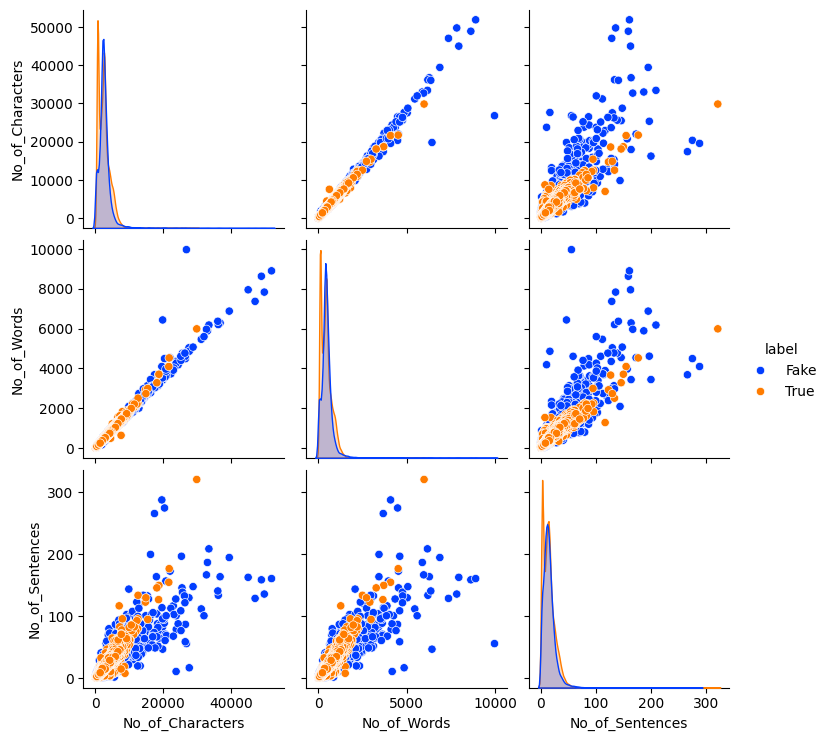

In [ ]:
plt.figure(figsize=(12,8))
sns.pairplot(data=df, hue="label",palette="bright")
plt.show()

In [ ]:
# Show Distribution of Subject
px.bar(df['subject'].value_counts(),
       title='Distribution of Subject',
       labels={'subject':'Subject','value':'Count'},
       color=df['subject'].value_counts().index,
       template='plotly_dark',
       text_auto=True,
       ).show()

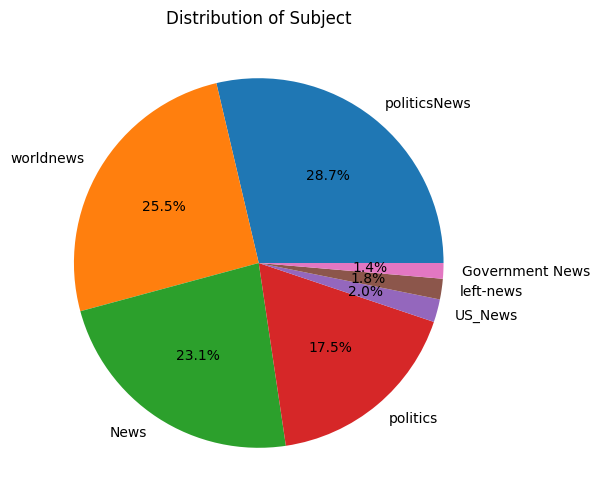

In [ ]:
plt.figure(figsize=(12,6))
plt.pie(df['subject'].value_counts(), labels=df['subject'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Subject')
plt.show()

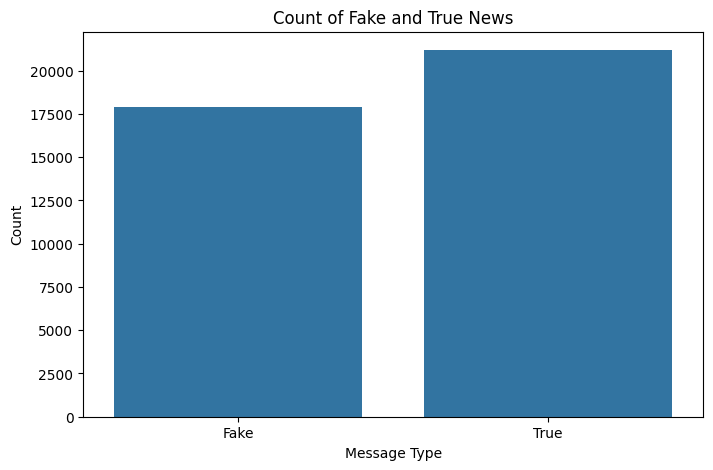

In [ ]:
# plot the count of spam and ham messages
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df)
plt.title('Count of Fake and True News')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()

In [ ]:
def clean(text):
    text = re.sub(r'[^a-zA-Z\d]', ' ', text)
    text = re.sub(r'(https?://\S+|www\.\S+)', '', text)
    text = re.sub(r'\s+', ' ', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    doc = nlp(' '.join(tokens))
    lemmatized = [token.lemma_ for token in doc if token.lemma_ != '-PRON-']

    return ' '.join(lemmatized)


df['cleanded_text'] = df['Content'].apply(lambda x: clean(x.lower()))

KeyboardInterrupt: 

In [ ]:
import re
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# --- chuẩn bị sẵn ---
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(tokens)

# --- bước 1: làm sạch cơ bản trước ---
df["cleaned_text"] = df["Content"].apply(lambda x: clean_text(x.lower()))

# --- bước 2: lemmatization bằng spaCy theo batch ---
texts = df["cleaned_text"].tolist()
lemmas = []

for doc in nlp.pipe(texts, batch_size=100, n_process=4):  # chạy song song
    lemmas.append(" ".join([token.lemma_ for token in doc if token.lemma_ != '-PRON-']))

df["cleaned_text"] = lemmas


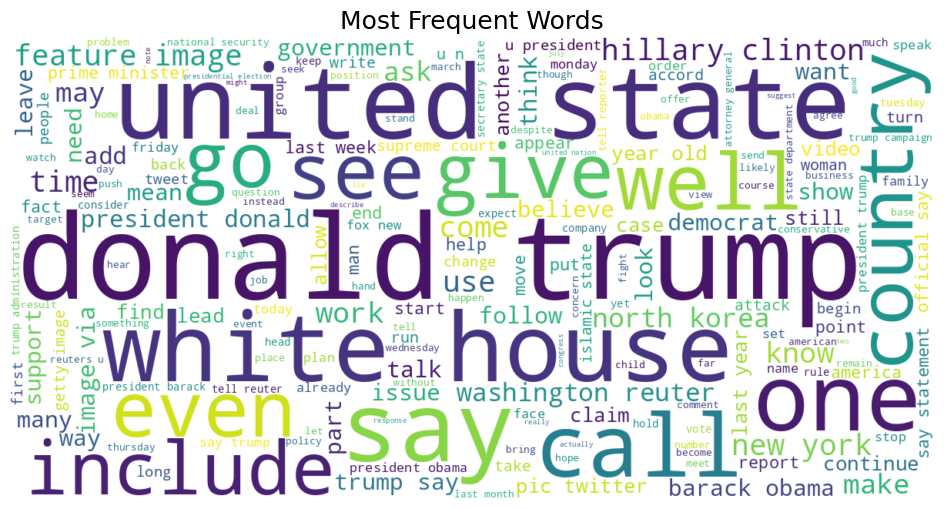

In [ ]:
# Generate a WordCloud from cleaned text
all_text = ' '.join(df['cleaned_text'])

wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    colormap='viridis',
    max_words=200
).generate(all_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words", fontsize=18)
plt.show()

In [ ]:
# Encode Categorical Columns
df['label'] = df['label'].map({'Fake':0,'True':1})
df.head()

,title,text,subject,date,label,Content,No_of_Characters,No_of_Words,No_of_Sentences,cleaned_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,Donald Trump Sends Out Embarrassing New Year’...,2973,614,28,donald trump send embarrass new year eve messa...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,Drunk Bragging Trump Staffer Started Russian ...,1968,339,11,drunk bragging trump staffer start russian col...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,Sheriff David Clarke Becomes An Internet Joke...,3688,706,25,sheriff david clarke become internet joke thre...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,Trump Is So Obsessed He Even Has Obama’s Name...,2853,537,15,trump obsess even obama name code website imag...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,Pope Francis Just Called Out Donald Trump Dur...,2417,469,19,pope francis call donald trump christmas speec...


In [ ]:
# Split Data
X = df[['cleaned_text']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print('X_train Shape :',X_train.shape)
print('X_test Shape :',X_test.shape)
print('y_train Shape :',y_train.shape)
print('y_test Shape :',y_test.shape)

X_train Shape : (31284, 1)
X_test Shape : (7821, 1)
y_train Shape : (31284,)
y_test Shape : (7821,)


In [ ]:
# Step 1: TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train['cleaned_text'])
X_test_tfidf = vectorizer.transform(X_test['cleaned_text'])

In [ ]:
def train(model ,model_name ,X_train ,y_train ,X_test ,y_test):
    model.fit(X_train,y_train)
    model_train_score = model.score(X_train,y_train)
    model_test_score = model.score(X_test,y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

def class_report(model ,X_test , y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=['Fake', 'True']))

In [ ]:
lr = LogisticRegression()
train(lr,"Logistic Regression", X_train_tfidf, y_train, X_test_tfidf, y_test)
class_report(lr, X_test_tfidf, y_test)

Logistic Regression model score on Training data: 99.05702595576014%
Logistic Regression model score on Testing data: 98.60631632783532%
              precision    recall  f1-score   support

        Fake       0.99      0.98      0.98      3582
        True       0.98      0.99      0.99      4239

    accuracy                           0.99      7821
   macro avg       0.99      0.99      0.99      7821
weighted avg       0.99      0.99      0.99      7821



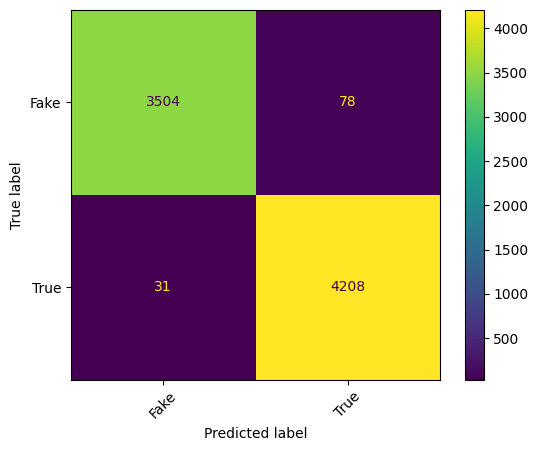

In [ ]:
ConfusionMatrixDisplay.from_estimator(lr,
                                       X_test_tfidf,
                                       y_test,
                                       xticks_rotation=45,
                                       display_labels=['Fake', 'True'])

In [ ]:
xgboost = model = XGBClassifier(objective = "binary:logistic" , subsample = 0.7 , min_child_weight = 3,
                                max_depth = 3 , learning_rate = 0.1 , gamma = 0 , colsample_bytree = 0.5,)
train(xgboost,"Xgboost", X_train_tfidf, y_train, X_test_tfidf, y_test)
class_report(xgboost, X_test_tfidf, y_test)

Xgboost model score on Training data: 99.76985040276179%
Xgboost model score on Testing data: 99.64198951540723%
              precision    recall  f1-score   support

        Fake       1.00      0.99      1.00      3582
        True       0.99      1.00      1.00      4239

    accuracy                           1.00      7821
   macro avg       1.00      1.00      1.00      7821
weighted avg       1.00      1.00      1.00      7821



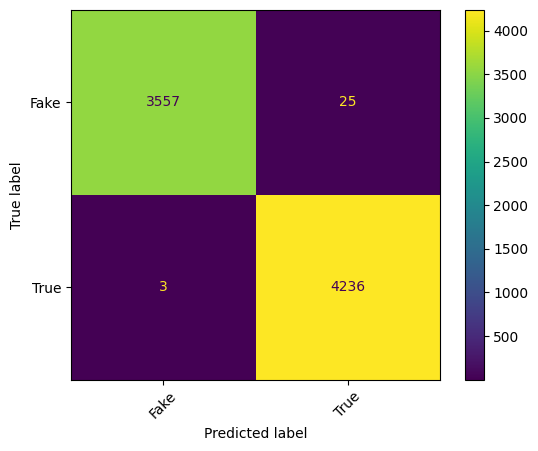

In [ ]:
ConfusionMatrixDisplay.from_estimator(xgboost,
                                       X_test_tfidf,
                                       y_test,
                                       xticks_rotation=45,
                                       display_labels=['Fake', 'True']
    );